In [1]:
# %pip install pandas
# %pip install numpy
# %pip install sklearn
# %pip install matplotlib
# %pip install pyswarms
# %pip install plotly

In [2]:
from utils import GPR, mean_squared_error, visualize, generate_sample

import numpy as np
from tqdm import tqdm
import plotly.express as px

np.random.seed(42)

In [ ]:
from sklearn import set_config
set_config(print_changed_only=False)

In [3]:
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)

n_train_data_points = 700
n_test_data_points = 10_000
n_dims = 2
lower_bound = -2.5, -1.5
upper_bound = +1.5, +2.5

In [4]:
X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=1)
X_test,  y_test  = generate_sample(n_test_data_points, n_dims, lower_bound, upper_bound, target_func)

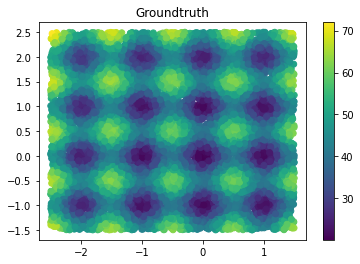

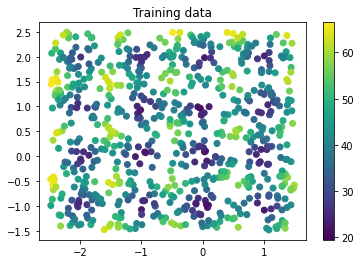

In [5]:
visualize(X_test, y_test, title='Groundtruth'), visualize(X_train, y_train, title='Training data');

In [6]:
hp = {
    'c1': 0.5, 
    'c2': 0.3, 
    'w': 0.9,
    'n_optim_steps': 10,
    'n_particles': 10,
    'n_restarts_optimizer': 10
}

gpr = GPR(**hp)

In [7]:
gpr = gpr.fit(X_train, y_train)

In [19]:
gpr.__dict__

{'c1': 0.5,
 'c2': 0.3,
 'w': 0.9,
 'options': {'c1': 0.5, 'c2': 0.3, 'w': 0.9},
 'n_optim_steps': 10,
 'n_particles': 10,
 'n_restarts_optimizer': 10,
 'model': GaussianProcessRegressor(n_restarts_optimizer=10,
                          optimizer=<bound method GPR.optim of GPR()>),
 'opt_hist': []}

In [9]:
y_pred = gpr.predict(X_test)
mean_squared_error(y_test, y_pred)

0.3922905961736848

In [10]:
# dauert m 40s
gpr = gpr.hyper_optimize(X_train, y_train)
y_pred = gpr.predict(X_test)
mean_squared_error(y_test, y_pred)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


KeyboardInterrupt: 

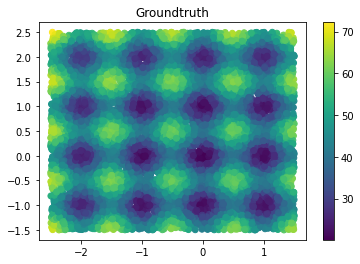

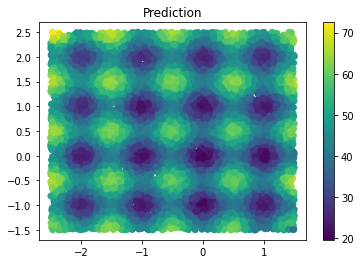

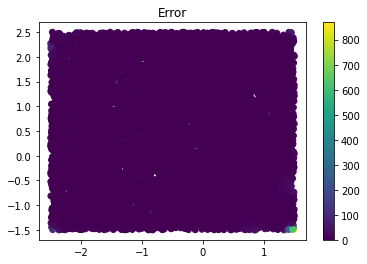

In [ ]:
visualize(X_test, y_test, title="Groundtruth")
visualize(X_test, y_pred, title="Prediction")
visualize(X_test, (y_test-y_pred)**2, title="Error");

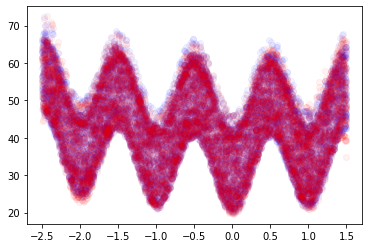

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test[0], target_func(X_test), label="Training data", color="blue", alpha=0.05)
plt.scatter(X_test[0], y_pred, label="Prediction", color="red", alpha=0.05);

In [ ]:
n_data_points = [50, 250, 500, 750, 1000, 2000, 5000]
errors = []
for n in tqdm(n_data_points):
    X_train, y_train = generate_sample(n, n_dims, lower_bound, upper_bound, target_func, noise_scale=0)
    gpr = GPR(**hp)
    gpr = gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
    
px.scatter(x=n_data_points, y=errors, title='Error vs. Number of Data Points', log_y=True, trendline="lowess")

100%|██████████| 7/7 [00:05<00:00,  1.34it/s]


In [ ]:
noise_scales = [1, 5, 10, 30, 50, 70]
errors = []
for noise in tqdm(noise_scales):
    X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=noise)
    gpr = GPR(**hp)
    gpr = gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
    
px.scatter(x=noise_scales, y=errors, title='Error vs. Noise Scale', trendline="lowess")

100%|██████████| 6/6 [00:00<00:00,  8.49it/s]
